# This demo is based on the official tutorial from the Seurat team

https://satijalab.org/seurat/articles/pbmc3k_tutorial.html

In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



# Load Data

In [3]:
# Load the PBMC dataset
pbmc.data <- Read10X(data.dir = "./pbmc/")

In [4]:
# Initialize the Seurat object with the raw (non-normalized data).
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


# Standard pre-processing workflow

## Filtering genes by mitochondrial genes

In [5]:
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

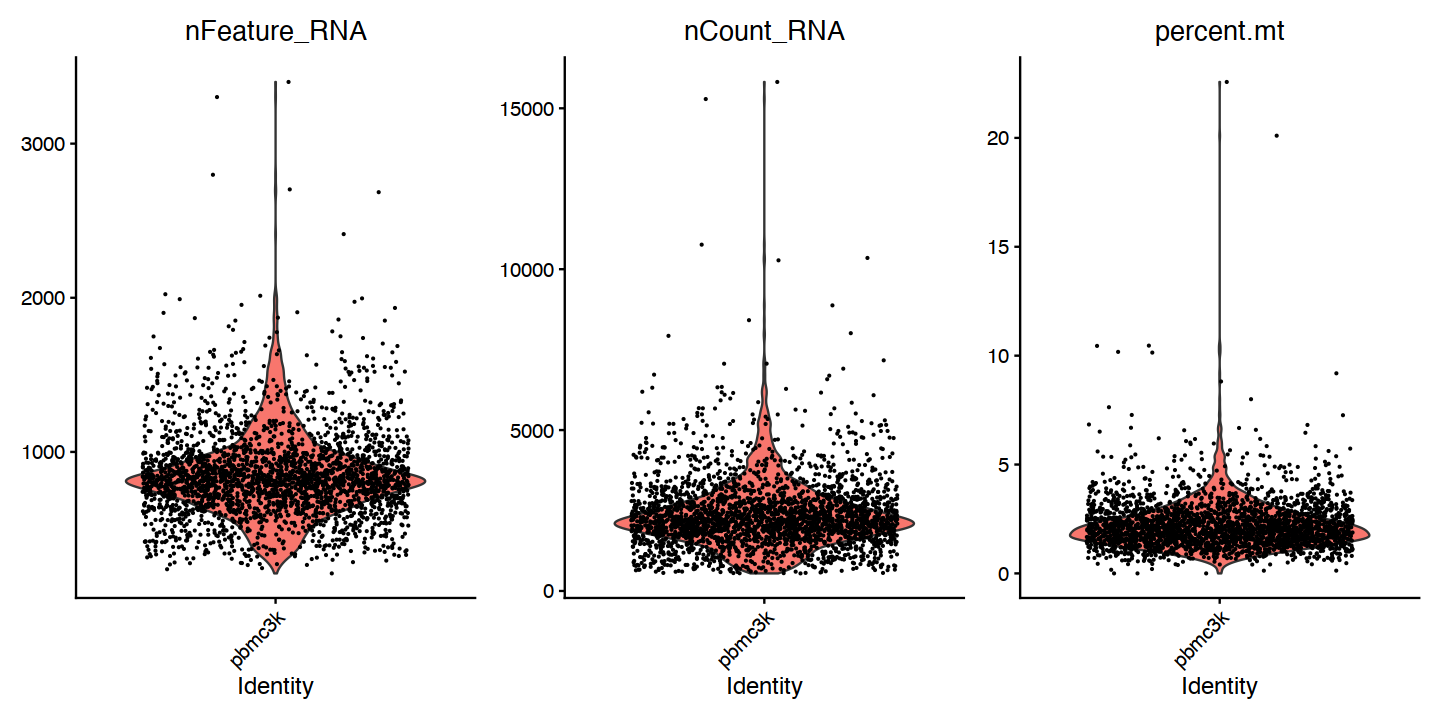

In [9]:
# Visualize QC metrics as a violin plot
options(repr.plot.height = 6, repr.plot.width = 12)
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

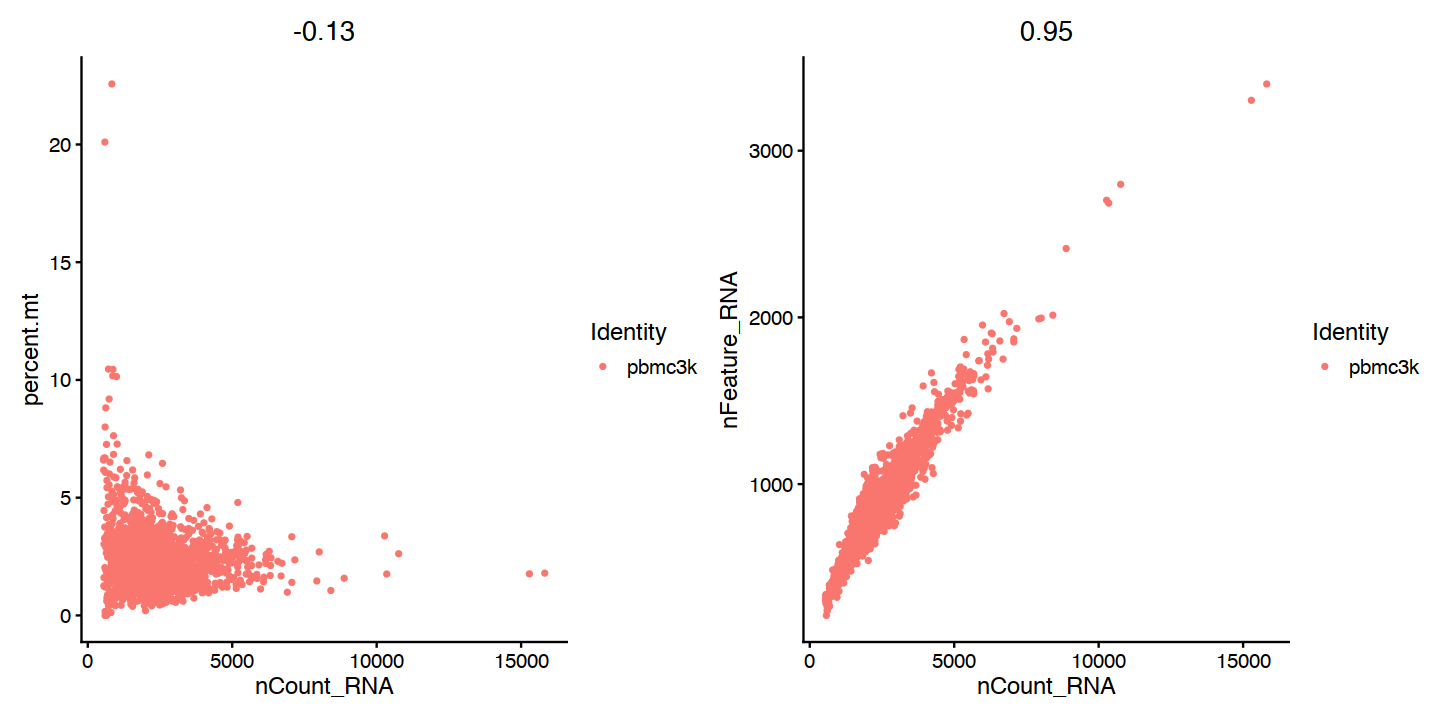

In [10]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.
options(repr.plot.height = 6, repr.plot.width = 12)
plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [11]:
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

## Normalizing the data

In [12]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

## Feature selection: Identification of highly variable features (genes)

In [13]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

In [14]:
# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


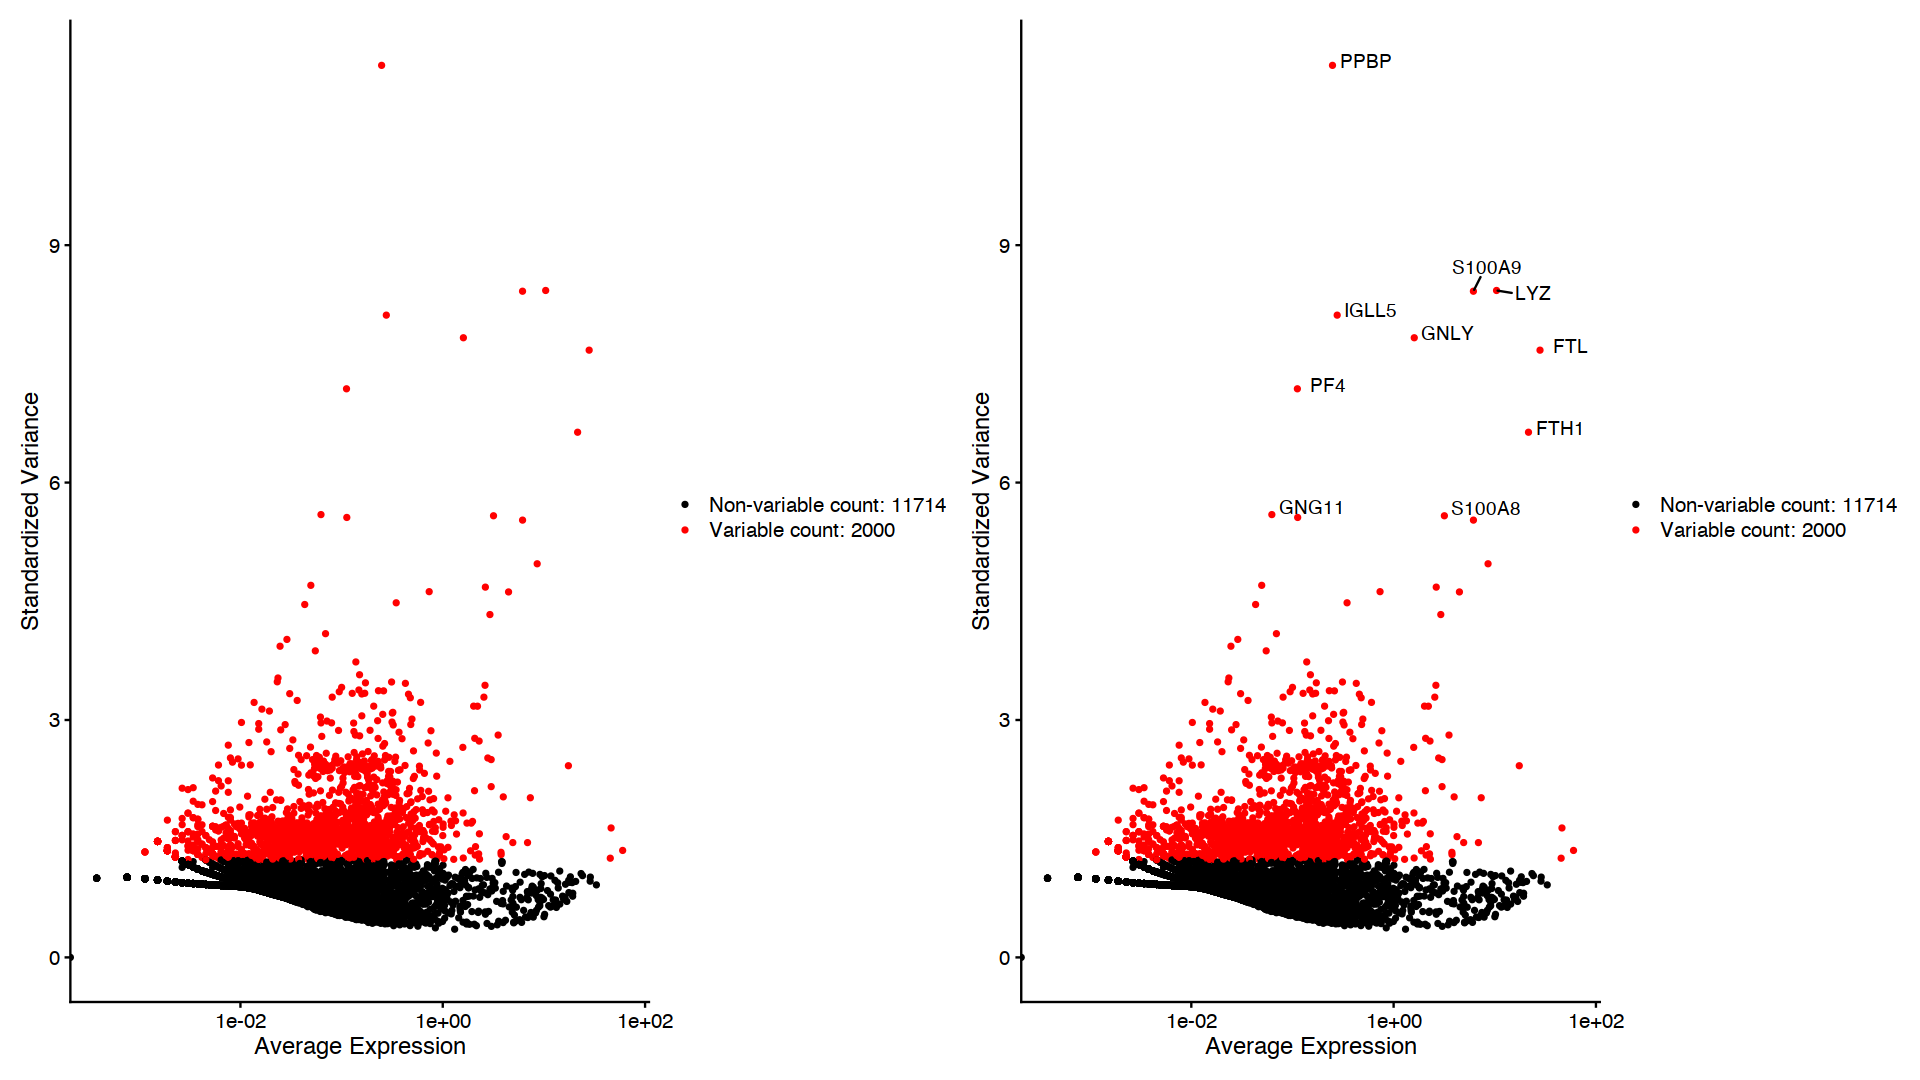

In [17]:
# plot variable features with and without labels
options(repr.plot.height = 9, repr.plot.width = 16)
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

## Scaling the data

Next, we apply a linear transformation (‘scaling’) that is a standard pre-processing step prior to dimensional reduction techniques like PCA. 

In [18]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



## Linear dimensional reduction (PCA)

In [19]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FTH1, LYZ, FCN1, S100A9, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, IFI30, SAT1, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   CD247, GIMAP5, AQP3, CCL5, SELL, TRAF3IP3, GZMA, MAL, CST7, ITM2A 
	   MYC, GIMAP7, HOPX, BEX2, LDLRAP1, GZMK, ETS1, ZAP70, TNFAIP8, RIC3 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DMA, HLA-DPB1, HLA-DQA2, CD37, HLA-DRB5, HLA-DMB, HLA-DPA1, FCRLA, HVCN1, LTB 
	   BLNK, P2RX5, IGLL5, IRF8, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX 
	   TTC38, APMAP, CTSC, S100A4, IGFBP7, ANXA1, ID2, IL32, XCL1, RHOC 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1, HLA-DPA

In [20]:
# Examine and visualize PCA results a few different ways
print(pbmc[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL 
Negative:  MALAT1, LTB, IL32, IL7R, CD2 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1 
Negative:  PPBP, PF4, SDPR, SPARC, GNG11 
PC_ 4 
Positive:  HLA-DQA1, CD79B, CD79A, MS4A1, HLA-DQB1 
Negative:  VIM, IL7R, S100A6, IL32, S100A8 
PC_ 5 
Positive:  GZMB, NKG7, S100A8, FGFBP2, GNLY 
Negative:  LTB, IL7R, CKB, VIM, MS4A7 


### Visualizations

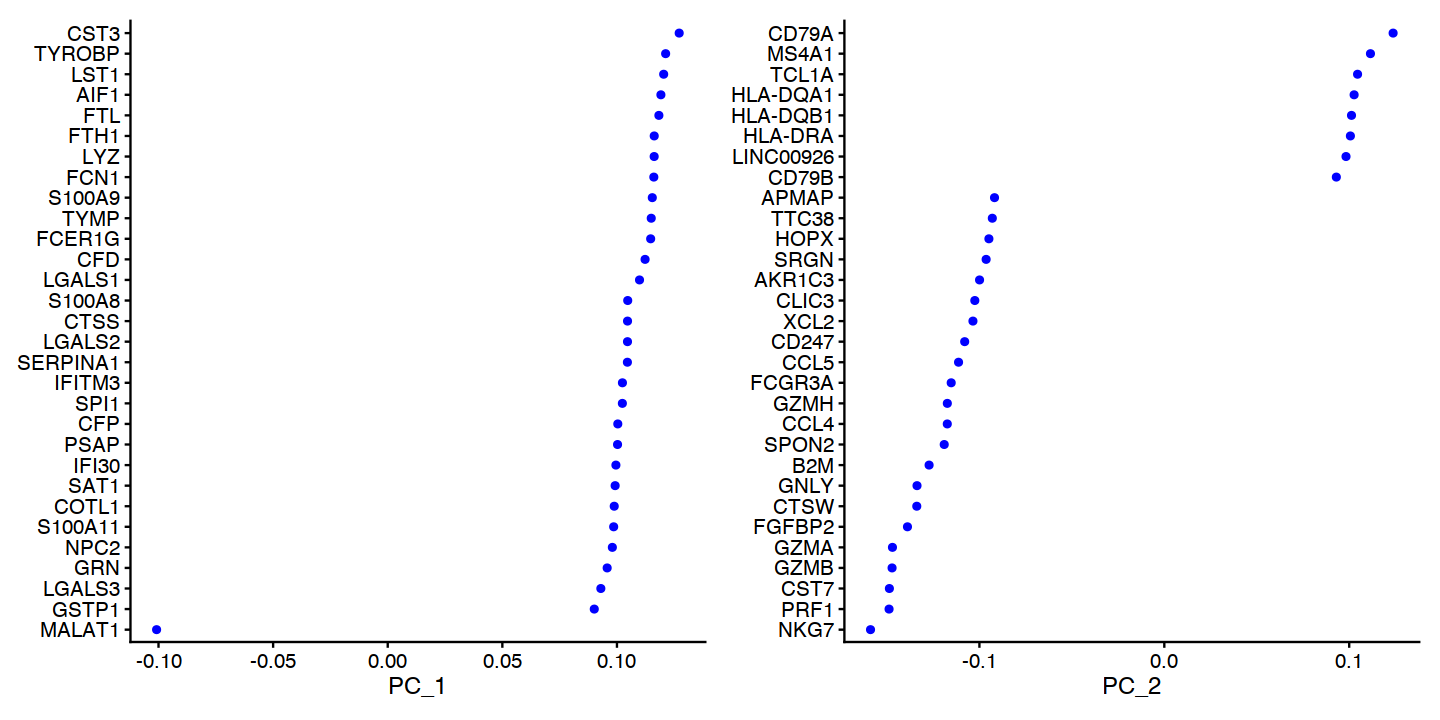

In [21]:
options(repr.plot.height = 6, repr.plot.width = 12)
VizDimLoadings(pbmc, dims = 1:2, reduction = "pca")

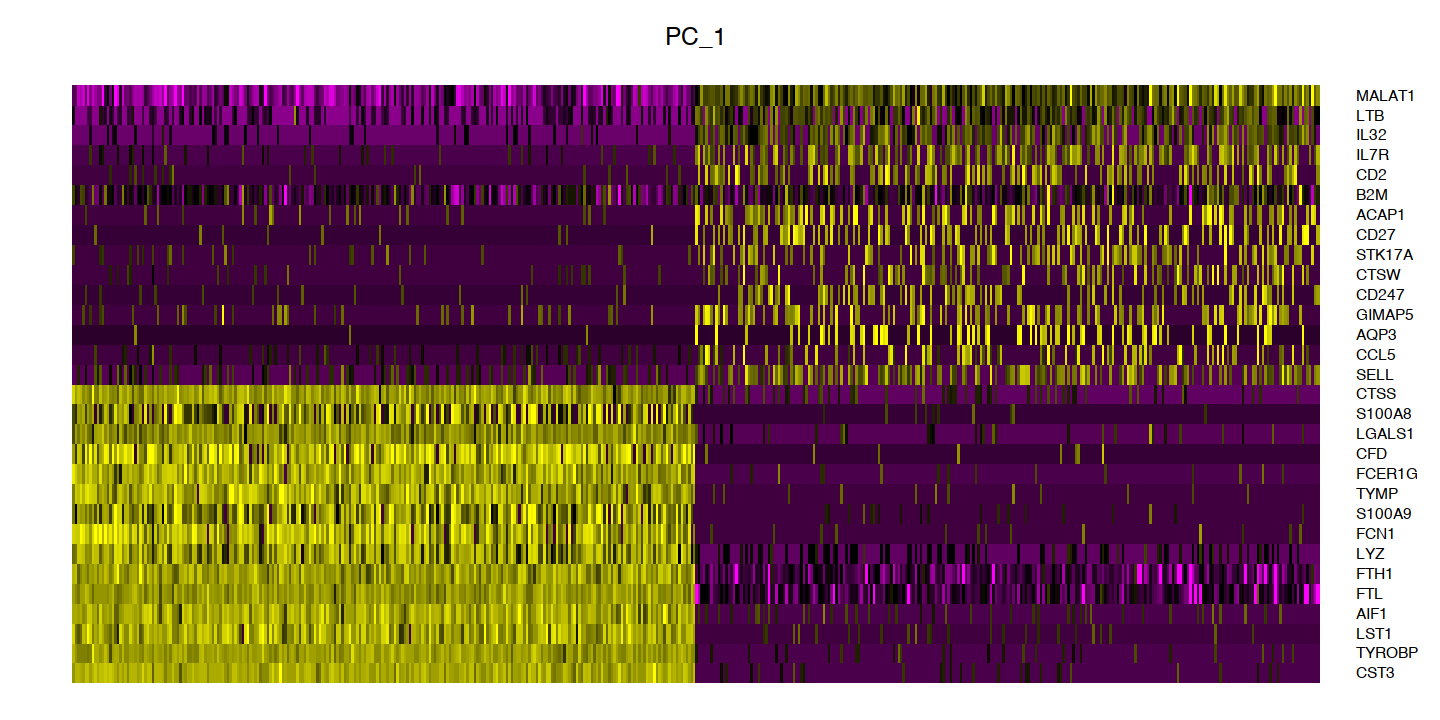

In [22]:
options(repr.plot.height = 6, repr.plot.width = 12)
DimHeatmap(pbmc, dims = 1, cells = 500, balanced = TRUE)

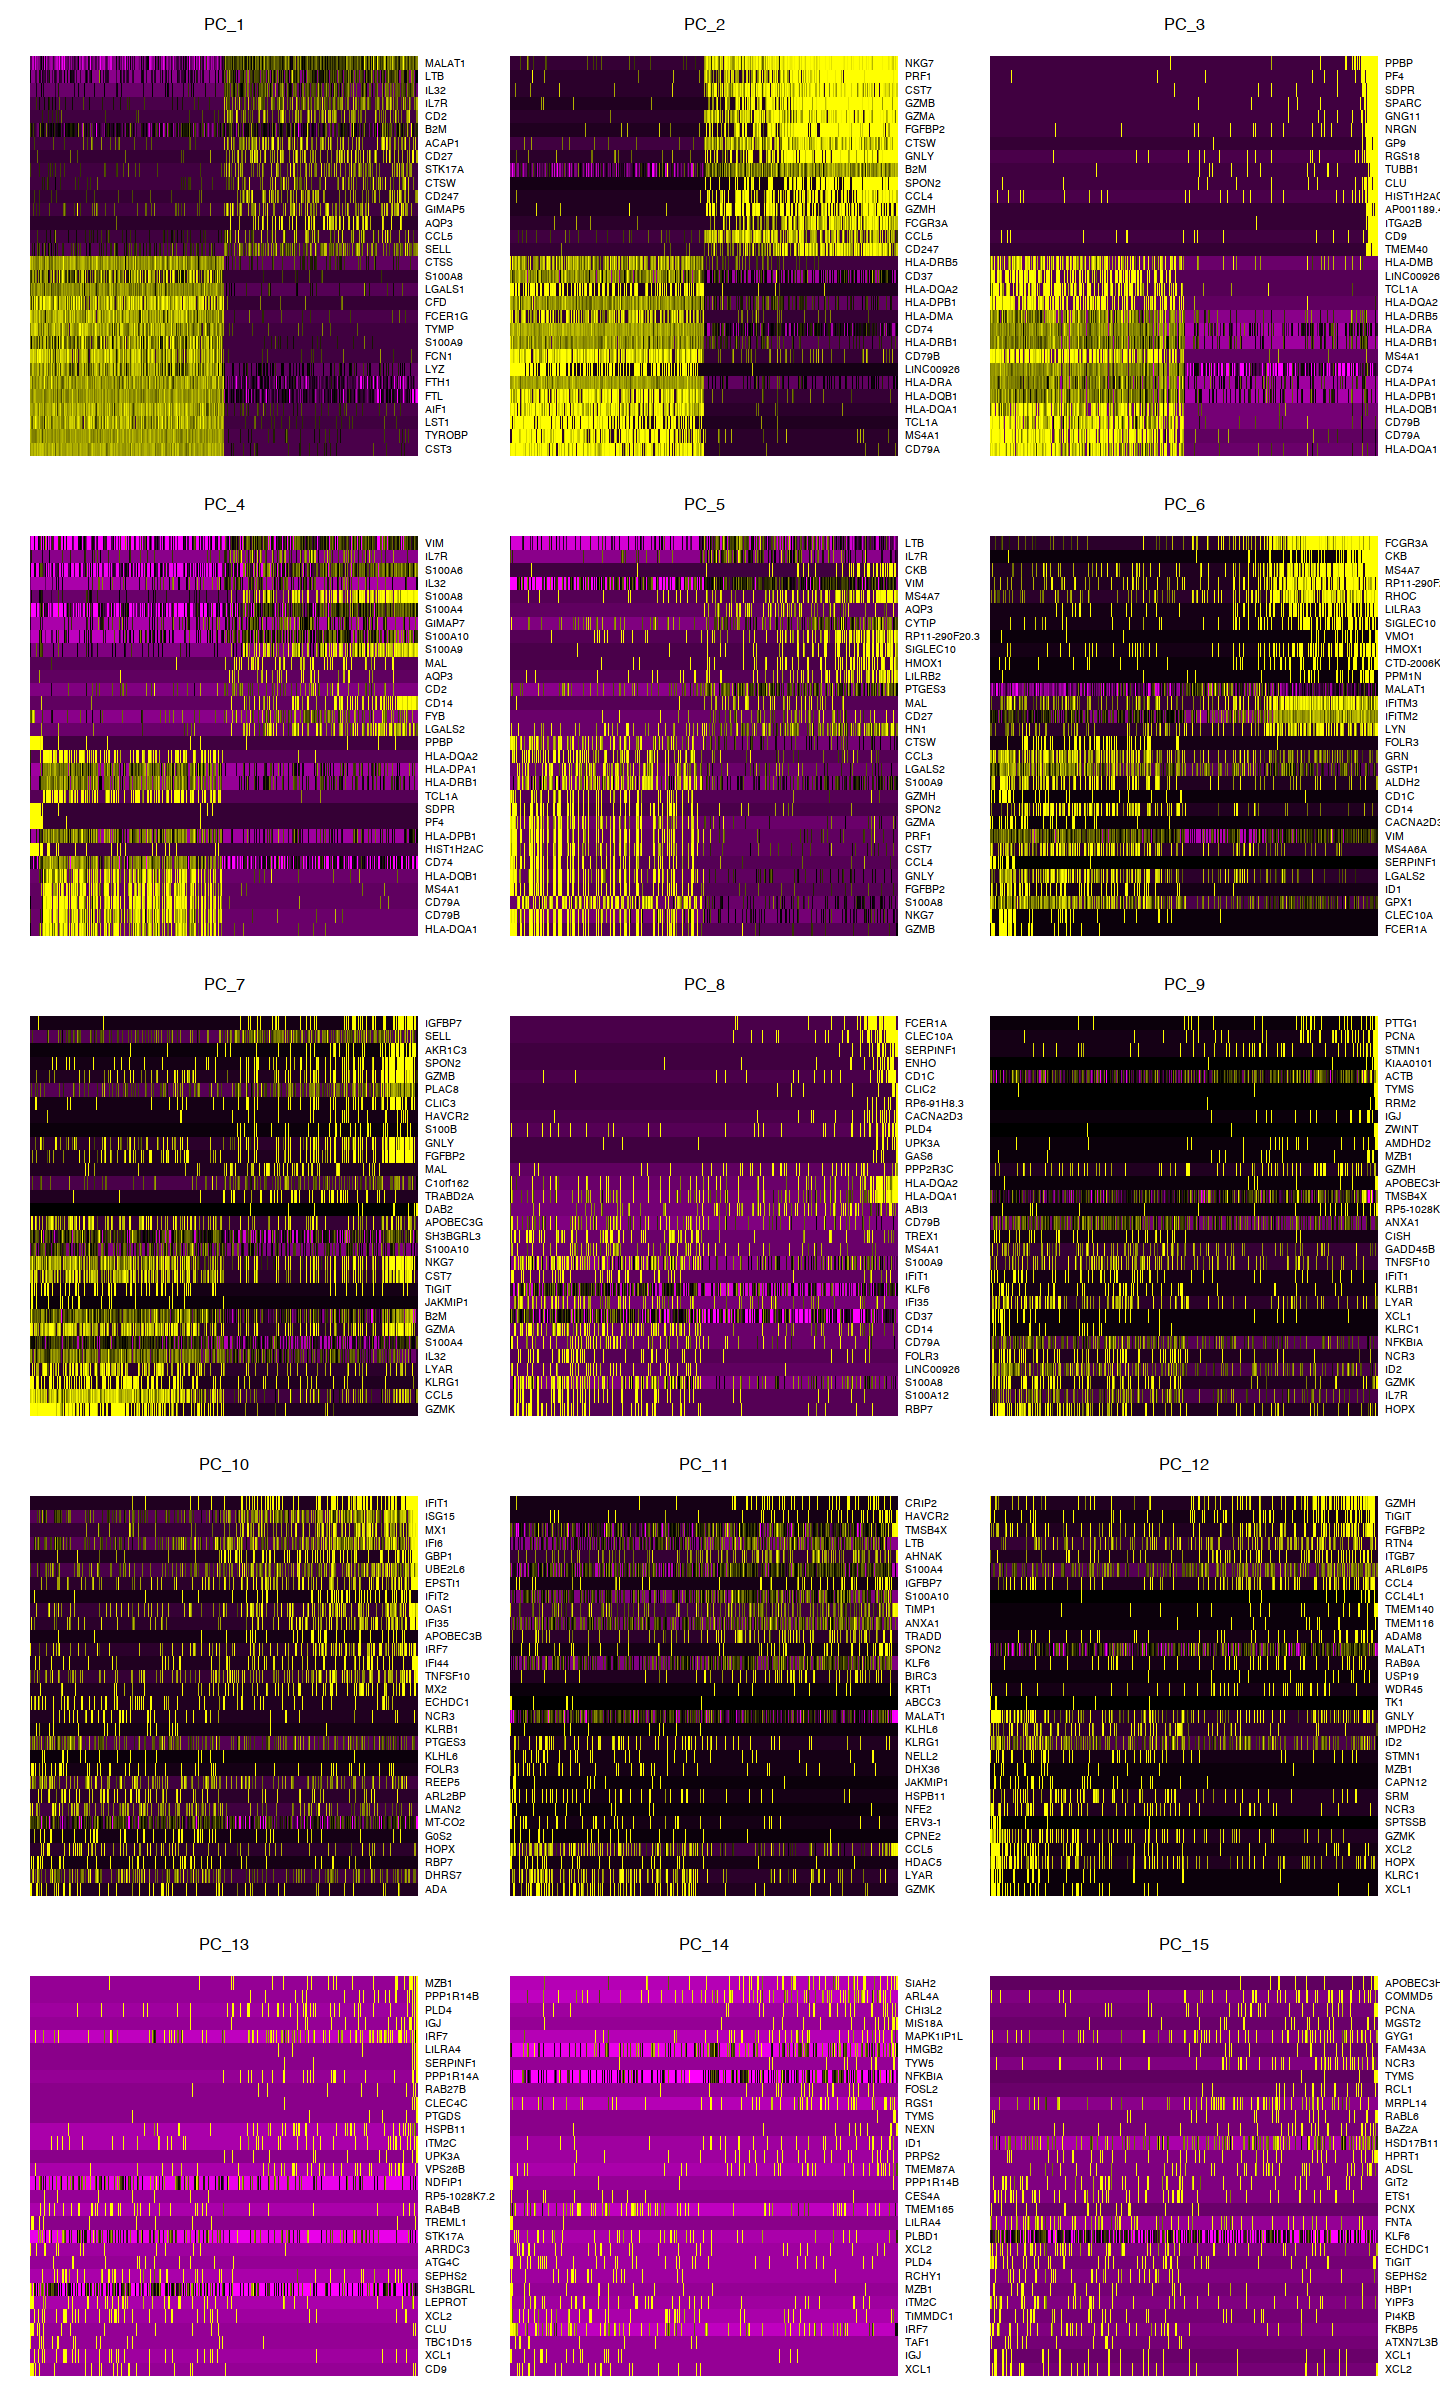

In [27]:
options(repr.plot.height = 20, repr.plot.width = 12)
DimHeatmap(pbmc, dims = 1:15, cells = 500, balanced = TRUE)

## Determine the ‘dimensionality’ of the dataset

In [28]:
# NOTE: This process can take a long time for big datasets, comment out for expediency. More
# approximate techniques such as those implemented in ElbowPlot() can be used to reduce
# computation time
pbmc <- JackStraw(pbmc, num.replicate = 100)
pbmc <- ScoreJackStraw(pbmc, dims = 1:20)

Warning message:
“Removed 23510 rows containing missing values (geom_point).”


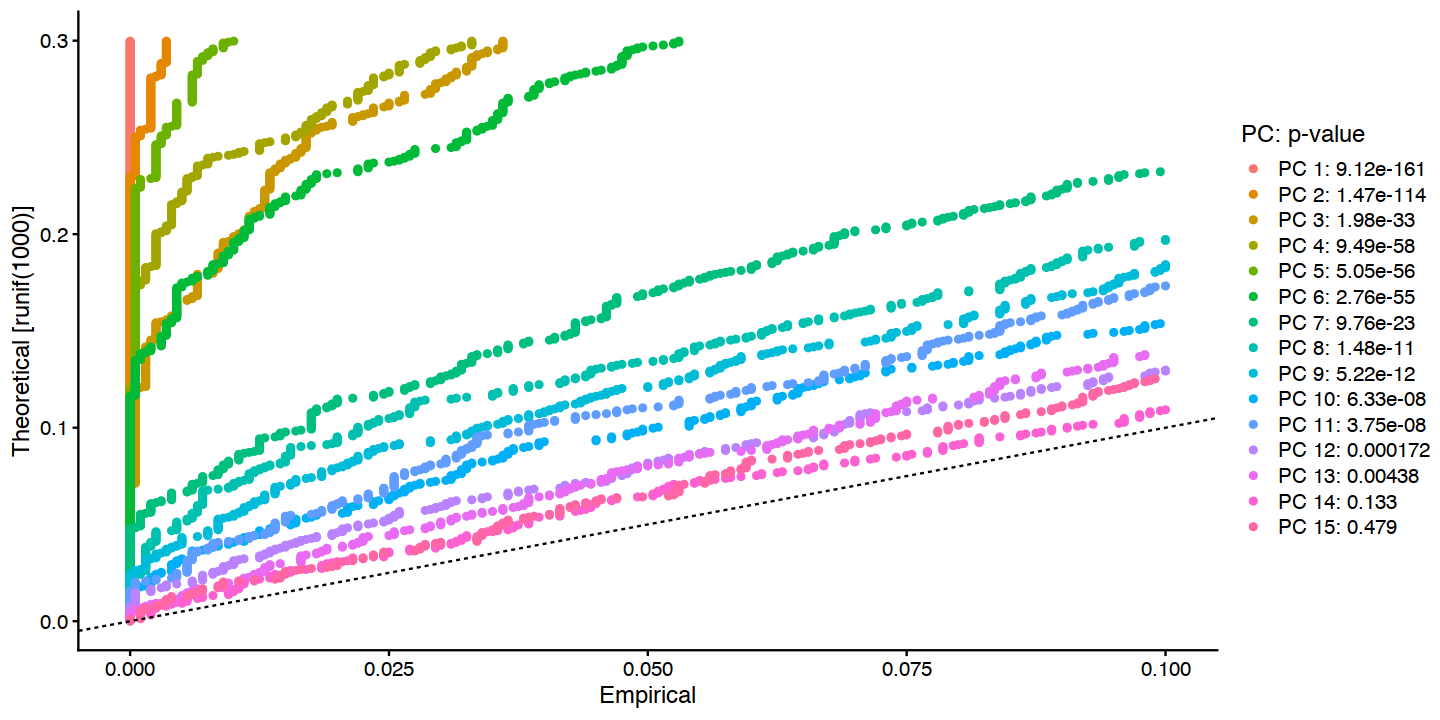

In [29]:
options(repr.plot.height = 6, repr.plot.width = 12)
JackStrawPlot(pbmc, dims = 1:15)

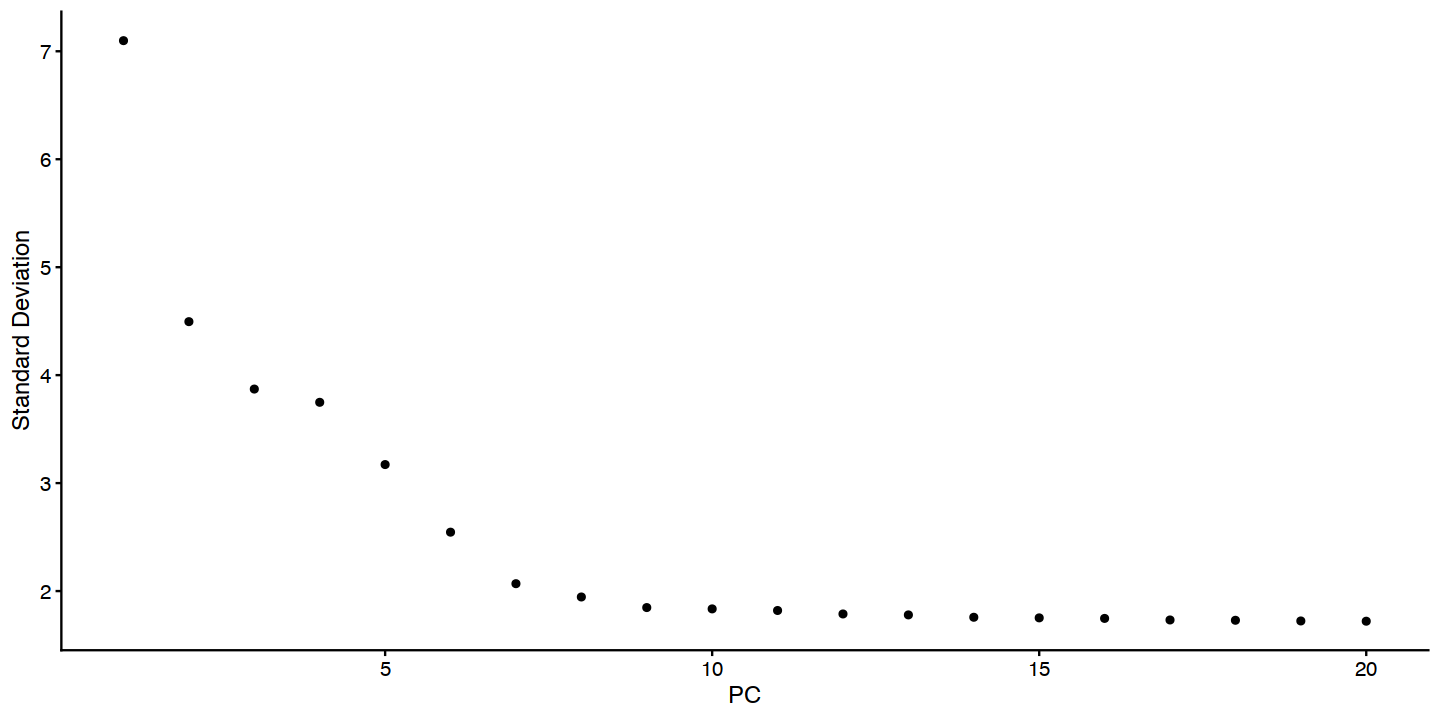

In [30]:
ElbowPlot(pbmc)

## Cluster the cells

In [31]:
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2638
Number of edges: 95927

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8728
Number of communities: 9
Elapsed time: 0 seconds


## Run non-linear dimensional reduction (UMAP/tSNE)

In [32]:
# If you haven't installed UMAP, you can do so via reticulate::py_install(packages =
# 'umap-learn')
pbmc <- RunUMAP(pbmc, dims = 1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
19:57:55 UMAP embedding parameters a = 0.9922 b = 1.112

19:57:55 Read 2638 rows and found 10 numeric columns

19:57:55 Using Annoy for neighbor search, n_neighbors = 30

19:57:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:57:55 Writing NN index file to temp file /var/folders/4x/bgvc7c257tg9yvl0brtsl7m80000gn/T//RtmpE5XEaZ/file1628476ce826a

19:57:55 Searching Annoy index using 1 thread, search_k = 3000

19:57:56 Annoy recall = 100%

19:57:56 Commencing smooth kNN distance calibra

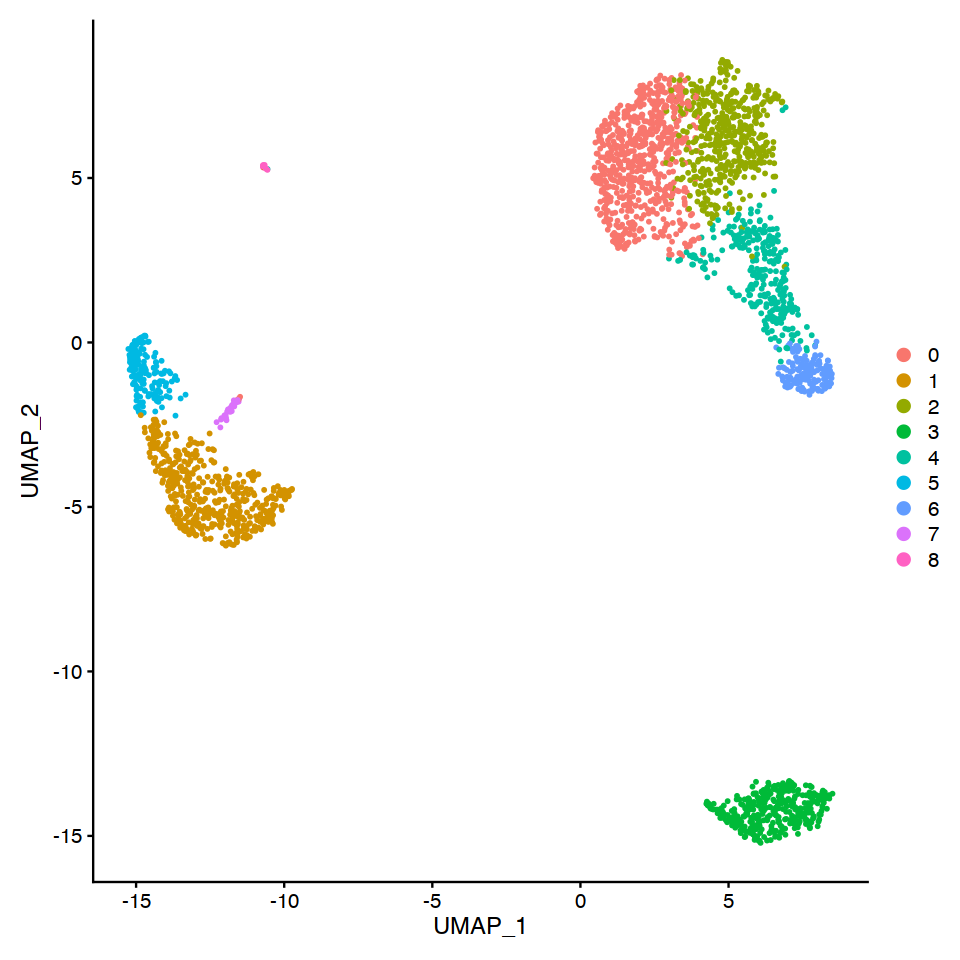

In [33]:
# note that you can set `label = TRUE` or use the LabelClusters function to help label
# individual clusters
options(repr.plot.height = 8, repr.plot.width = 8)
DimPlot(pbmc, reduction = "umap")

## Finding differentially expressed features (cluster biomarkers)

In [34]:
# find all markers of cluster 2
cluster2.markers <- FindMarkers(pbmc, ident.1 = 2, min.pct = 0.25)
head(cluster2.markers, n = 5)

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IL32,2.892340e-90,1.2013522,0.947,0.465,3.966555e-86
LTB,1.060121e-86,1.2695776,0.981,0.643,1.453850e-82
CD3D,8.794641e-71,0.9389621,0.922,0.432,1.206097e-66
IL7R,3.516098e-68,1.1873213,0.750,0.326,4.821977e-64
LDHB,1.642480e-67,0.8969774,0.954,0.614,2.252497e-63


In [35]:
# find all markers distinguishing cluster 5 from clusters 0 and 3
cluster5.markers <- FindMarkers(pbmc, ident.1 = 5, ident.2 = c(0, 3), min.pct = 0.25)
head(cluster5.markers, n = 5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FCGR3A,8.246578e-205,4.261495,0.975,0.040,1.130936e-200
IFITM3,1.677613e-195,3.879339,0.975,0.049,2.300678e-191
CFD,2.401156e-193,3.405492,0.938,0.038,3.292945e-189
CD68,2.900384e-191,3.020484,0.926,0.035,3.977587e-187
RP11-290F20.3,2.513244e-186,2.720057,0.840,0.017,3.446663e-182


In [36]:
# find markers for every cluster compared to all remaining cells, report only the positive ones
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
pbmc.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
3.746131e-112,1.085056,0.912,0.592,5.137444e-108,0,LDHB
9.571984e-88,1.358977,0.447,0.108,1.312702e-83,0,CCR7
0.000000e+00,5.571681,0.996,0.215,0.000000e+00,1,S100A9
0.000000e+00,5.476844,0.975,0.121,0.000000e+00,1,S100A8
1.060121e-86,1.269578,0.981,0.643,1.453850e-82,2,LTB
2.966019e-58,1.227797,0.420,0.111,4.067598e-54,2,AQP3
0.000000e+00,4.310172,0.936,0.041,0.000000e+00,3,CD79A
9.481783e-271,3.591579,0.622,0.022,1.300332e-266,3,TCL1A
5.611855e-202,3.099672,0.983,0.234,7.696099e-198,4,CCL5


In [37]:
cluster0.markers <- FindMarkers(pbmc, ident.1 = 0, logfc.threshold = 0.25, test.use = "roc", only.pos = TRUE)


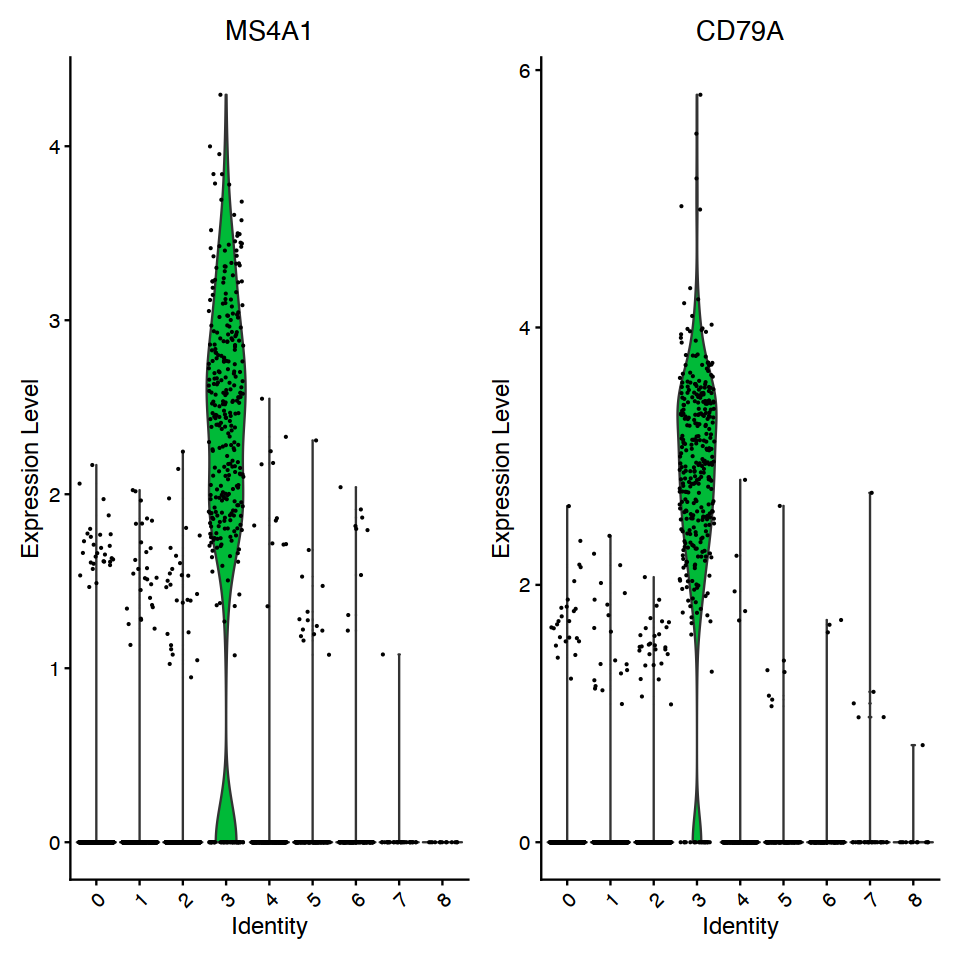

In [38]:
VlnPlot(pbmc, features = c("MS4A1", "CD79A"))

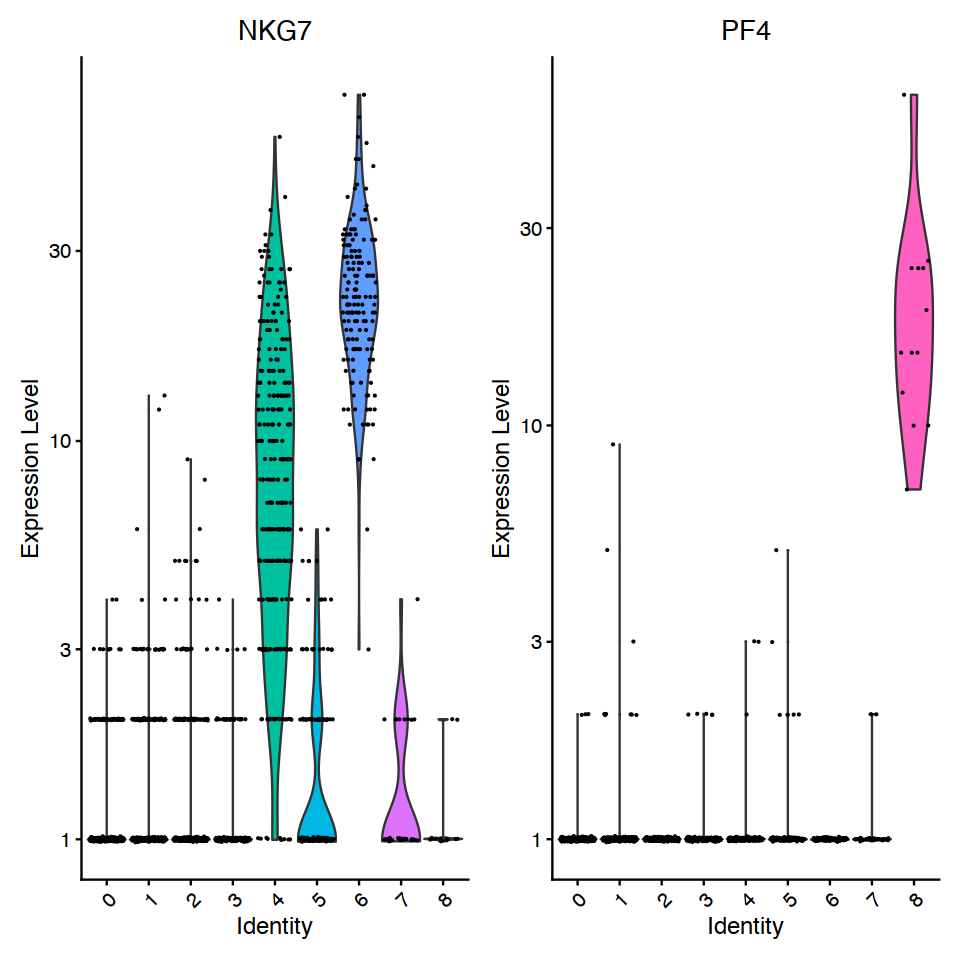

In [39]:
# you can plot raw counts as well
VlnPlot(pbmc, features = c("NKG7", "PF4"), slot = "counts", log = TRUE)

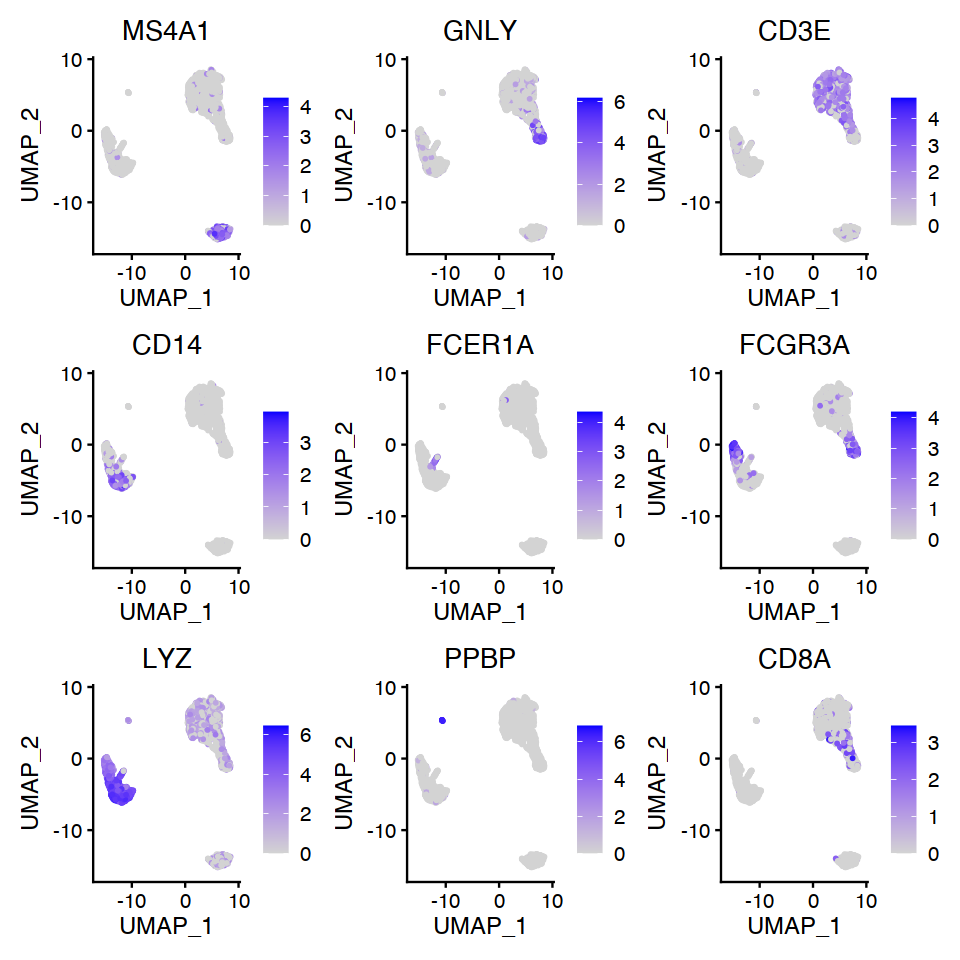

In [40]:
FeaturePlot(pbmc, features = c("MS4A1", "GNLY", "CD3E", "CD14", "FCER1A", "FCGR3A", "LYZ", "PPBP", 
    "CD8A"))

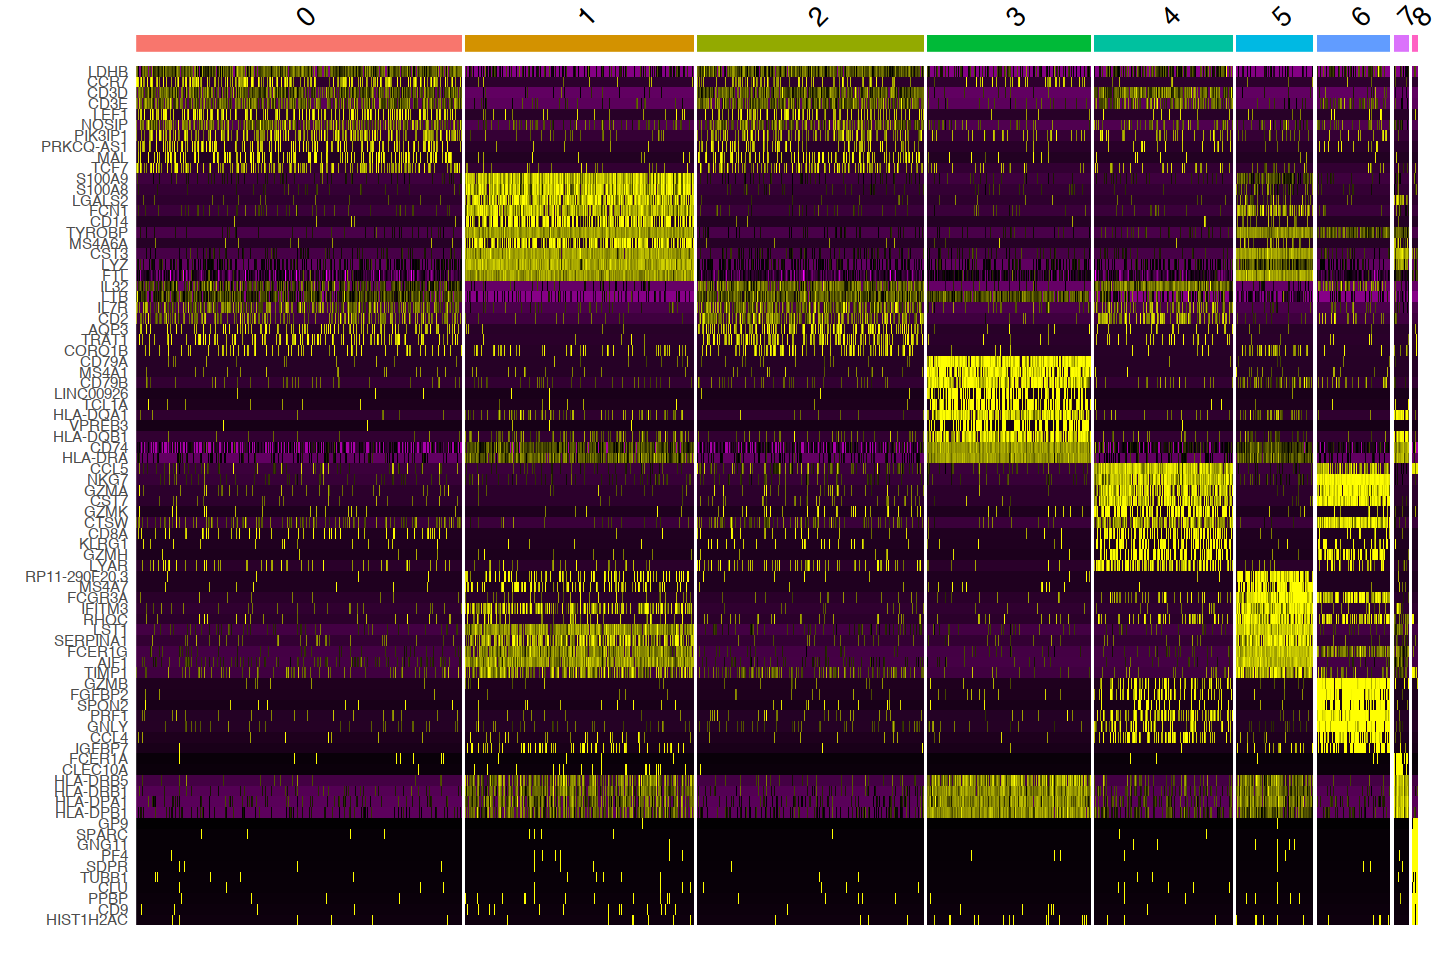

In [42]:
options(repr.plot.height = 8, repr.plot.width = 12)
top10 <- pbmc.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
DoHeatmap(pbmc, features = top10$gene) + NoLegend()

## Assigning cell type identity to clusters

Fortunately in the case of this dataset, we can use canonical markers to easily match the unbiased clustering to known cell types:

| Cluster ID | Markers | Cell Type |
| --- | --- | --- |
| 0 | IL7R, CCR7 | Naive CD4+ T |
| 1 | CD14, LYZ | CD14+ Mono |
| 2 | IL7R, S100A4 | Memory CD4+ |
| 3 | MS4A1 | B |
| 4 | CD8A | CD8+ T |
| 5 | FCGR3A, MS4A7 | FCGR3A+ Mono |
| 6 | GNLY, NKG7 | NK |
| 7 | FCER1A, CST3 | DC |
| 8 | PPBP | Platelet |

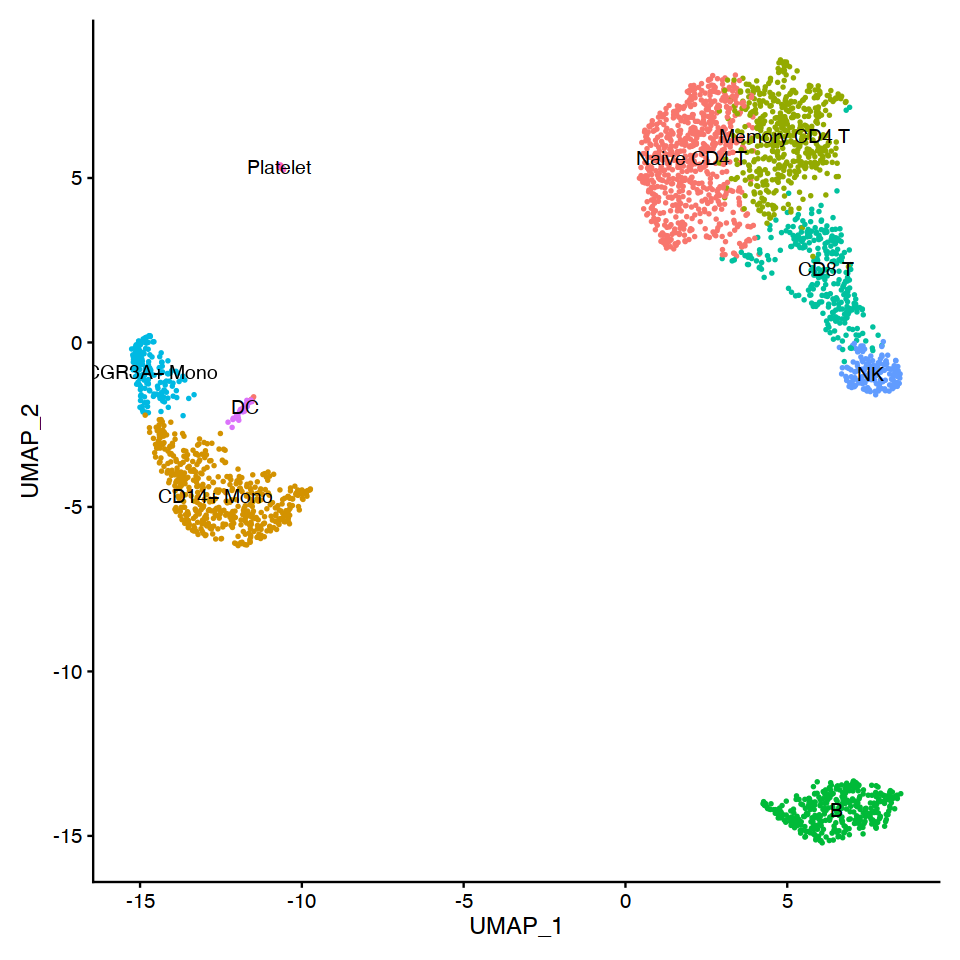

In [44]:
new.cluster.ids <- c("Naive CD4 T", "CD14+ Mono", "Memory CD4 T", "B", "CD8 T", "FCGR3A+ Mono", 
    "NK", "DC", "Platelet")
names(new.cluster.ids) <- levels(pbmc)
pbmc <- RenameIdents(pbmc, new.cluster.ids)
options(repr.plot.height = 8, repr.plot.width = 8)
DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

In [47]:
# Add cell type annotations to the metadata
pbmc@meta.data[['celltype']] <- pbmc@active.ident

In [48]:
saveRDS(pbmc, file = "seurat_pbmc3k.rds")